In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, GRU, Bidirectional, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
# Importing and cleaning the data
data = pd.read_csv("./data.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,2,1,1,6,10,1,0,...,0,0.000000,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,11,1,1,4,4,1,0,...,6,14.000000,0,6,6,6,13.666667,0,0.79,2
2,1,1,5,5,1,1,10,10,1,0,...,0,0.000000,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,15,1,1,6,4,1,0,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,2
4,2,12,1,3,0,1,10,10,0,0,...,5,12.333333,0,6,6,6,13.000000,0,0.79,2


In [3]:
print(data.shape)
print(list(data.columns))

(4424, 27)
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'GDP', 'Target']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [5]:
X = data.drop('Target', axis=1)
y = data['Target']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((3539, 26), (885, 26))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(26,)),  # 26 features as input
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32,verbose = 1)

Epoch 1/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8721 - val_loss: 1.0361 - val_accuracy: 0.7542
Epoch 2/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.8711 - val_loss: 1.0979 - val_accuracy: 0.7331
Epoch 3/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.8760 - val_loss: 1.1729 - val_accuracy: 0.7458
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8735 - val_loss: 1.2382 - val_accuracy: 0.7500
Epoch 5/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.8721 - val_loss: 1.2239 - val_accuracy: 0.7415
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.8633 - val_loss: 1.1112 - val_accuracy: 0.7458
Epoch 7/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.8672 - val_loss: 1.1982 - val_accuracy: 0.7444
Epoch 8/100
8

Epoch 59/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8788 - val_loss: 1.1776 - val_accuracy: 0.7458
Epoch 60/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8714 - val_loss: 1.1626 - val_accuracy: 0.7514
Epoch 61/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8760 - val_loss: 1.1734 - val_accuracy: 0.7486
Epoch 62/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8785 - val_loss: 1.1343 - val_accuracy: 0.7556
Epoch 63/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.8654 - val_loss: 1.0996 - val_accuracy: 0.7359
Epoch 64/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8711 - val_loss: 1.1102 - val_accuracy: 0.7387
Epoch 65/100
89/89 [==============================] - 0s 4ms/step - loss: 0.3453 - accuracy: 0.8711 - val_loss: 1.1998 - val_accuracy: 0.7444
Epoch 

In [36]:
# Evaluate the model on test data
# Assuming you have your test data in `X_test_scaled` and `y_test` and your model named `model`
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

111/111 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8935
Test Accuracy: 0.8934727311134338


111/111 [==============================] - 0s 1ms/step


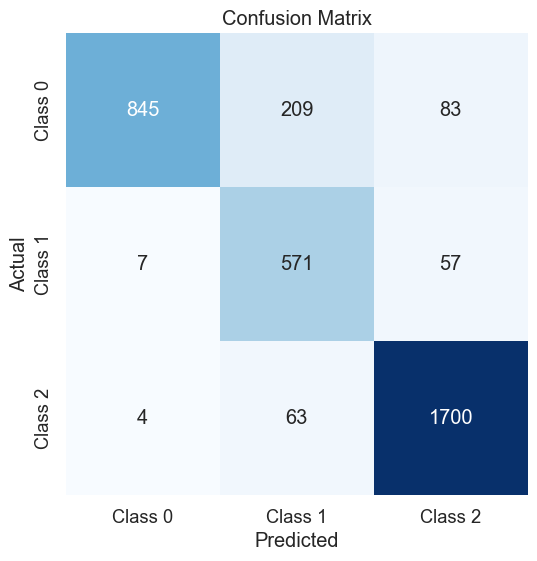

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      1137
           1       0.68      0.90      0.77       635
           2       0.92      0.96      0.94      1767

    accuracy                           0.88      3539
   macro avg       0.86      0.87      0.85      3539
weighted avg       0.90      0.88      0.88      3539



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your test data in `X_test_scaled` and `y_test` and your model named `model`

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels (assuming you want to use a threshold of 0.5)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Generate a classification report for the test data
class_report = classification_report(y_test, y_pred_classes)
# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)  # Adjust the font scale for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)
